In [22]:
from XTSTree.XTSTreePageHinkley import XTSTreePageHinkley
from plot import plot
import random
import numpy as np
import pandas as pd

Série de exemplo

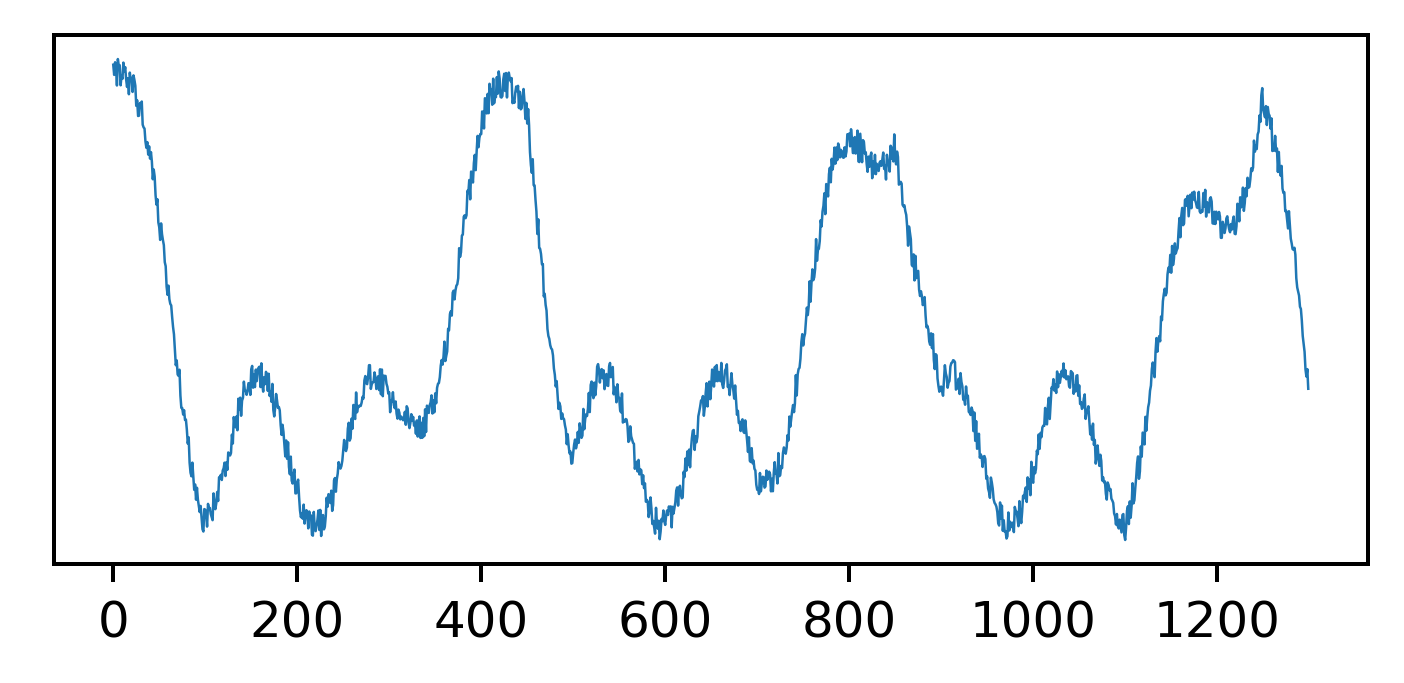

In [23]:
generator = np.random.default_rng(42)

series = np.concatenate([
  np.array(generator.uniform(-0.2, 0.2, 100)) + np.linspace(0, 5, 100)[::-1],
  
  np.array(generator.uniform(-0.2, 0.2, 200)),
  np.array(generator.uniform(-0.2, 0.2, 150)) + np.linspace(0, 5, 150),
  np.array(generator.uniform(-0.2, 0.2, 50)) + np.linspace(0, 5, 50)[::-1],

  np.array(generator.uniform(-0.2, 0.2, 200)),
  np.array(generator.uniform(-0.2, 0.2, 150)) + np.linspace(0, 5, 150),
  np.array(generator.uniform(-0.2, 0.2, 50)) + np.linspace(0, 5, 50)[::-1],

  np.array(generator.uniform(-0.2, 0.2, 200)),
  np.array(generator.uniform(-0.2, 0.2, 150)) + np.linspace(0, 5, 150),
  np.array(generator.uniform(-0.2, 0.2, 50)) + np.linspace(0, 5, 50)[::-1],
])
series = series + np.sin([i/20 for i in range(len(series))])

plot(series, show_axis=(True, False))

Criando XTSTree

In [24]:
xtstree = XTSTreePageHinkley(
  # Condição de parada pra corte, adf com stop_val 0 significa que pra árvore executar um corte em uma série, a série precisa ser estacionária. Aumentar o stop_val significa que a série precisa ser estacionária com uma folga pra ele executar o corte
  stop_condition='adf',
  stop_val=0,
  # A XTSTree faz uma busca pra tentar achar o melhor corte na série, se max_iter iterações passarem e ela não tiver encontrado um corte por algum motivo, ela faz uma escolha entre os cortes que ela encontrou
  max_iter=100,
  # Distância mínima entre os cortes pra evitar que sejam feitos muitos cortes juntos um do outro
  min_dist=int(len(series)/100),
  # Valores para o page_hinkley
	min_instances=30,
	delta=0.005,
	# O threshold tem um valor inicial porque é feita uma busca binária para achar o threshold que dá só um corte na série
	starting_threshold=50.0,
	alpha=1 - 0.0001,
)

Criando cortes na série

Não achei só um corte, escolhendo corte que gera maior pontuação, 881, 329.8689022092168, 2, 2


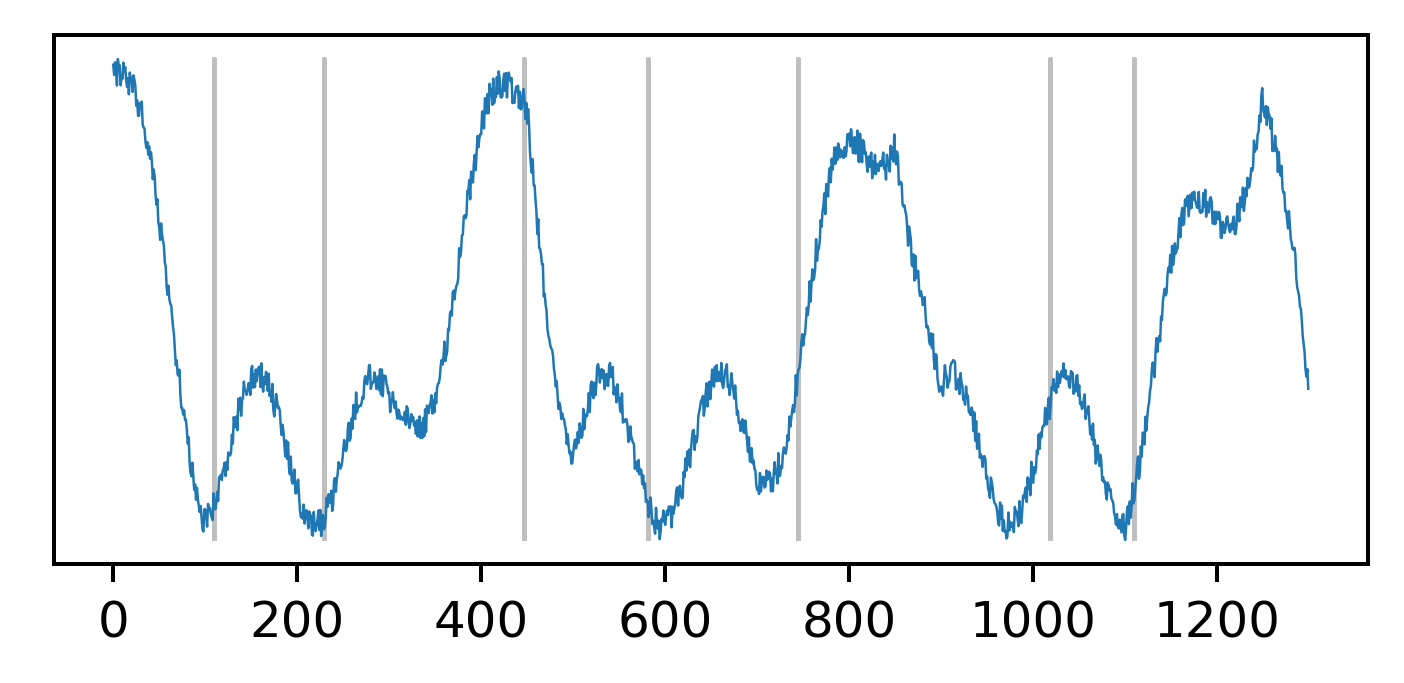

In [28]:
# Cria a árvore de cortes em cima da série e retorna a própria xtstree
xtstree = xtstree.create_splits(series)

# Função retorna uma lista com os índices dos cortes
cuts = xtstree.cut_points()

plot(series, divisions=cuts, show_axis=(True, False))

Cortes por profundidade

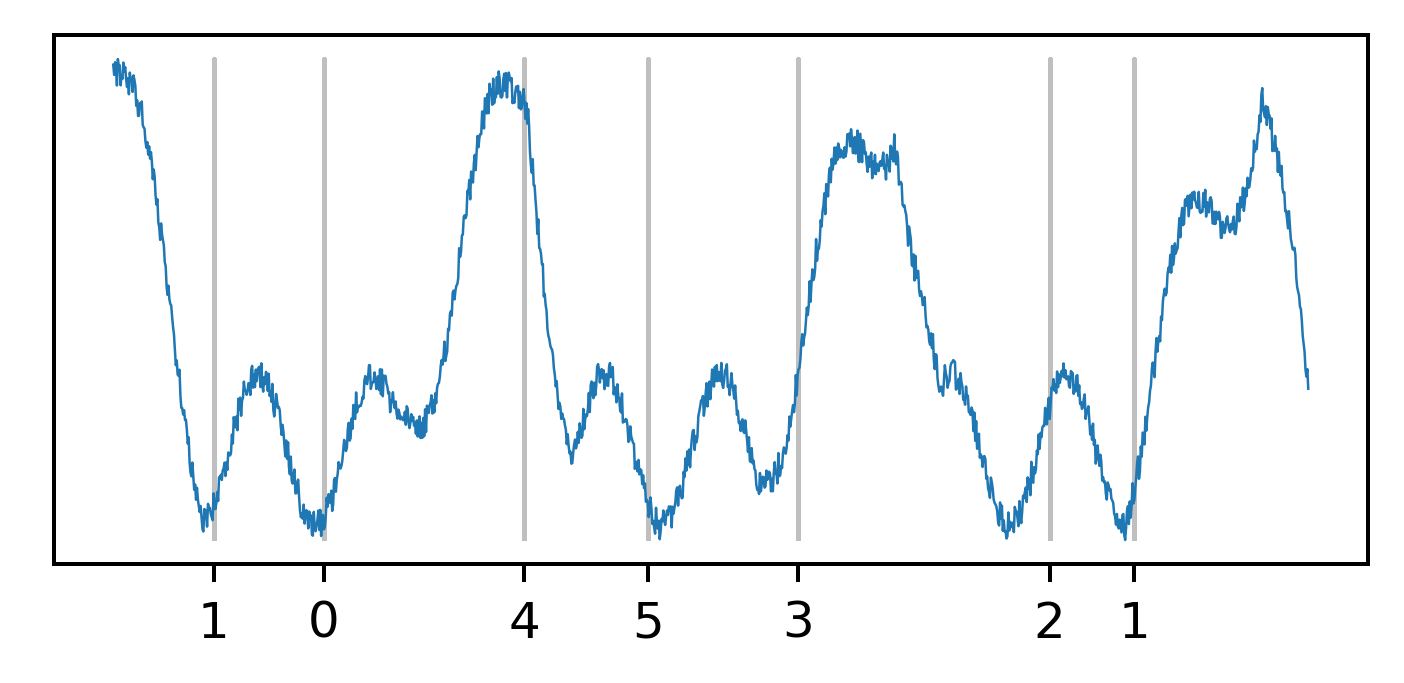

In [29]:
labels = []
for depth, d_cuts in xtstree.get_cuts_by_depth().items():
  for cut in d_cuts:
    labels.append({'x': cut, 'label': depth})

plot(series, divisions=cuts, show_axis=(True, False), labels=labels)

Iterando pelas folhas da árvore

In [7]:
for start, finish in zip([0, *cuts], [*cuts, len(series)]):
  print(len(series[start:finish]))
	# plot(series[start:finish], show_axis=(True, False))

109
120
218
134
163
274
92
190


Heatmap da árvore

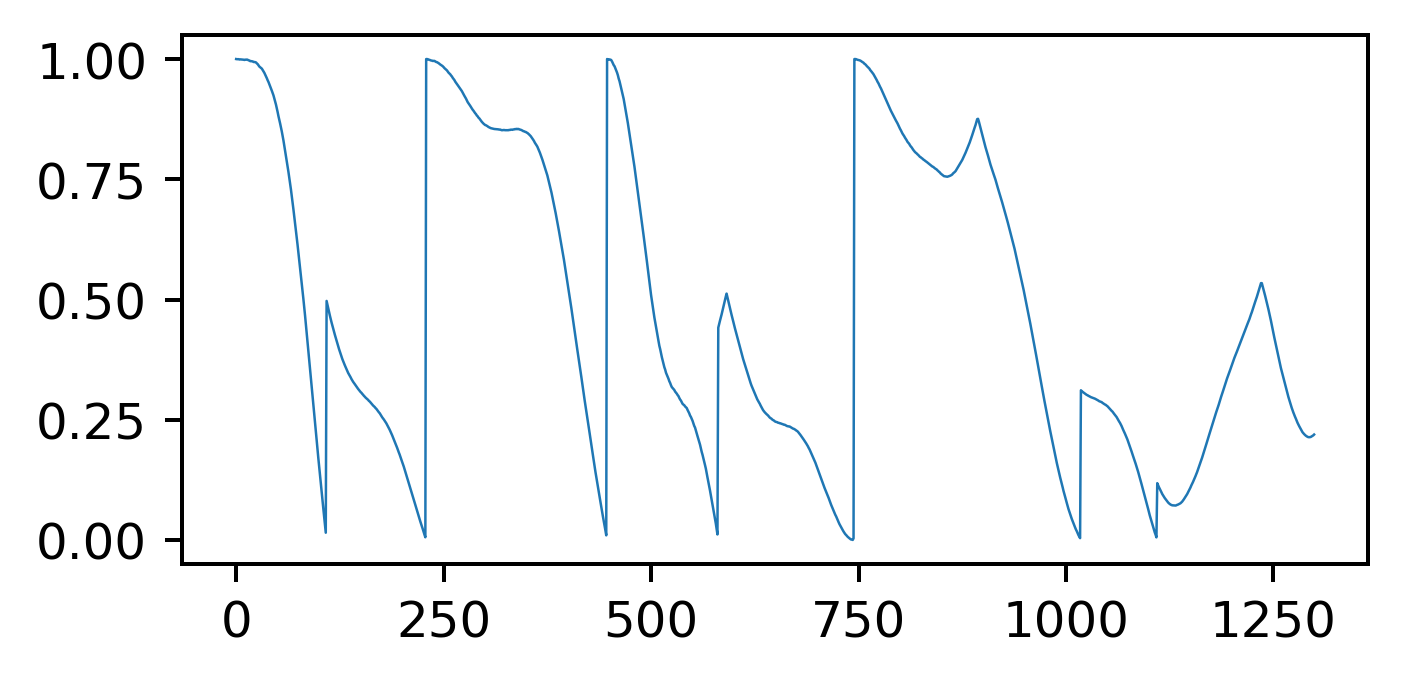

In [8]:
# A árvore guarda um heatmap que indica o quão próximo a árvore está de fazer um corte ao longo da série.
# Quanto chega em 0, a árvore faz um corte se passou pela condição de parada

plot(xtstree.get_heatmap())

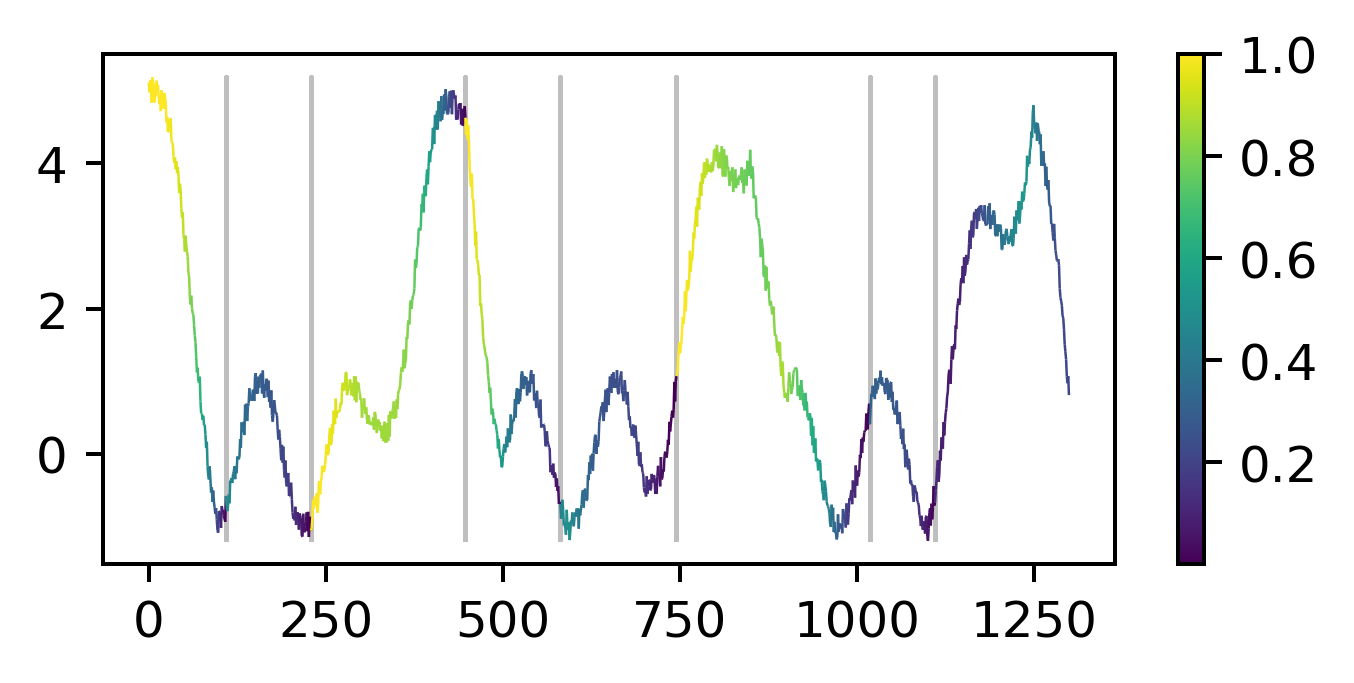

In [10]:
plot(series, color_gradient=xtstree.get_heatmap(), divisions=cuts)

Sumário dos cortes da árvore, tem a lista de cortes dividido por profundidade e indexado pelo caminho até o nó

In [11]:
xtstree.summary()

{0: [{'Root': 229}],
 1: [{'L': 109}, {'R': 1110}],
 2: [{'RL': 1018}],
 3: [{'RLL': 744}],
 4: [{'RLLL': 447}],
 5: [{'RLLLR': 581}]}

Retorna a série cortada usando os cortes até aquela profundidade

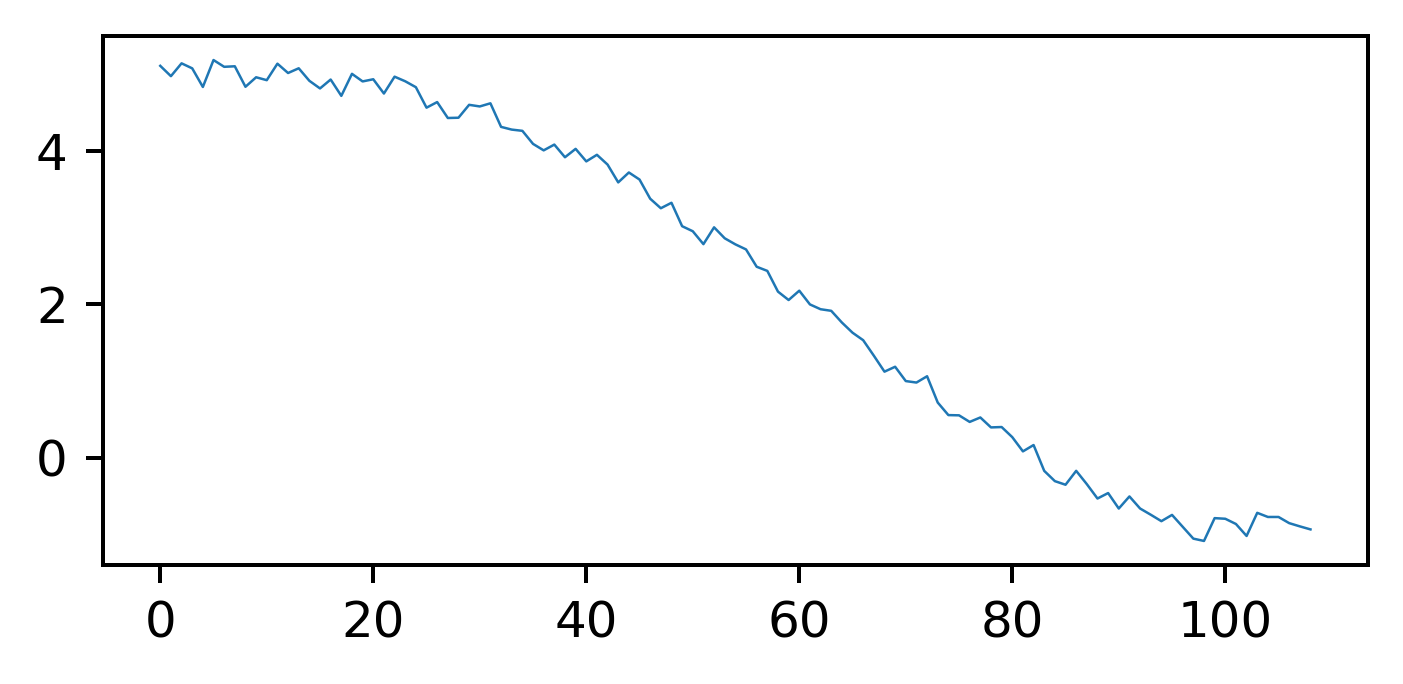

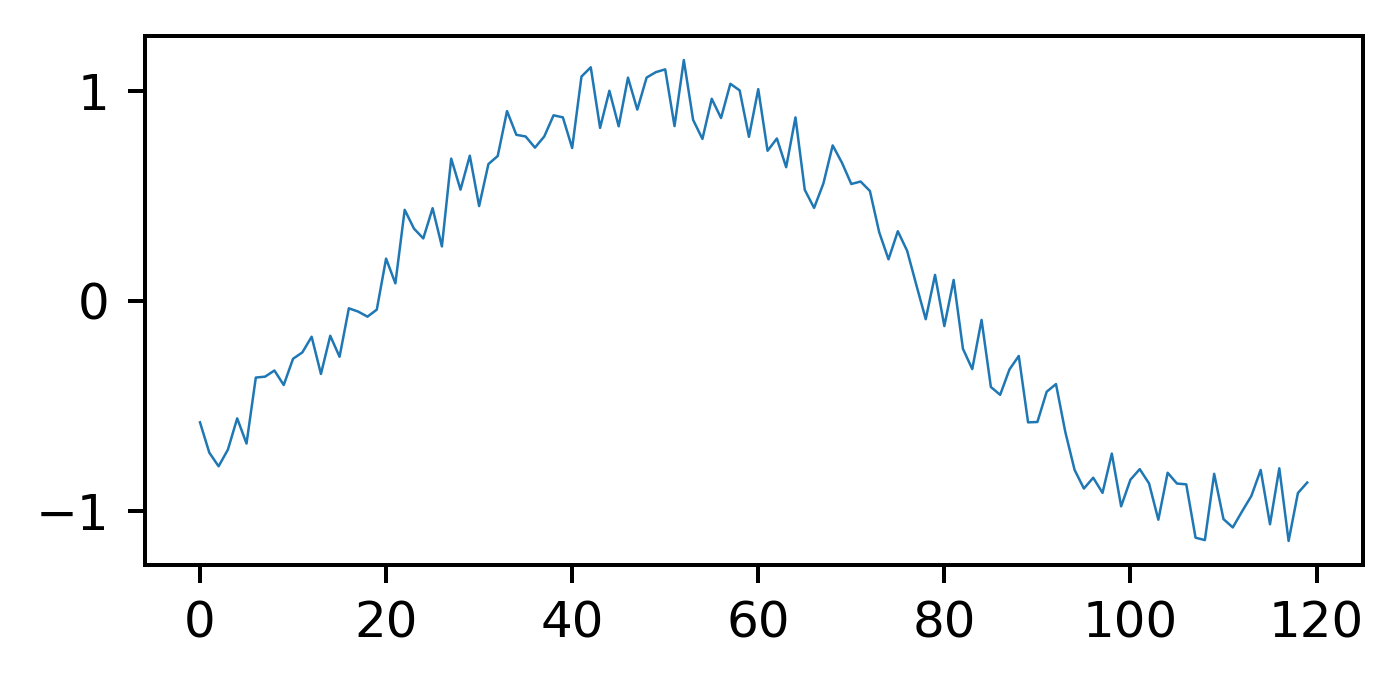

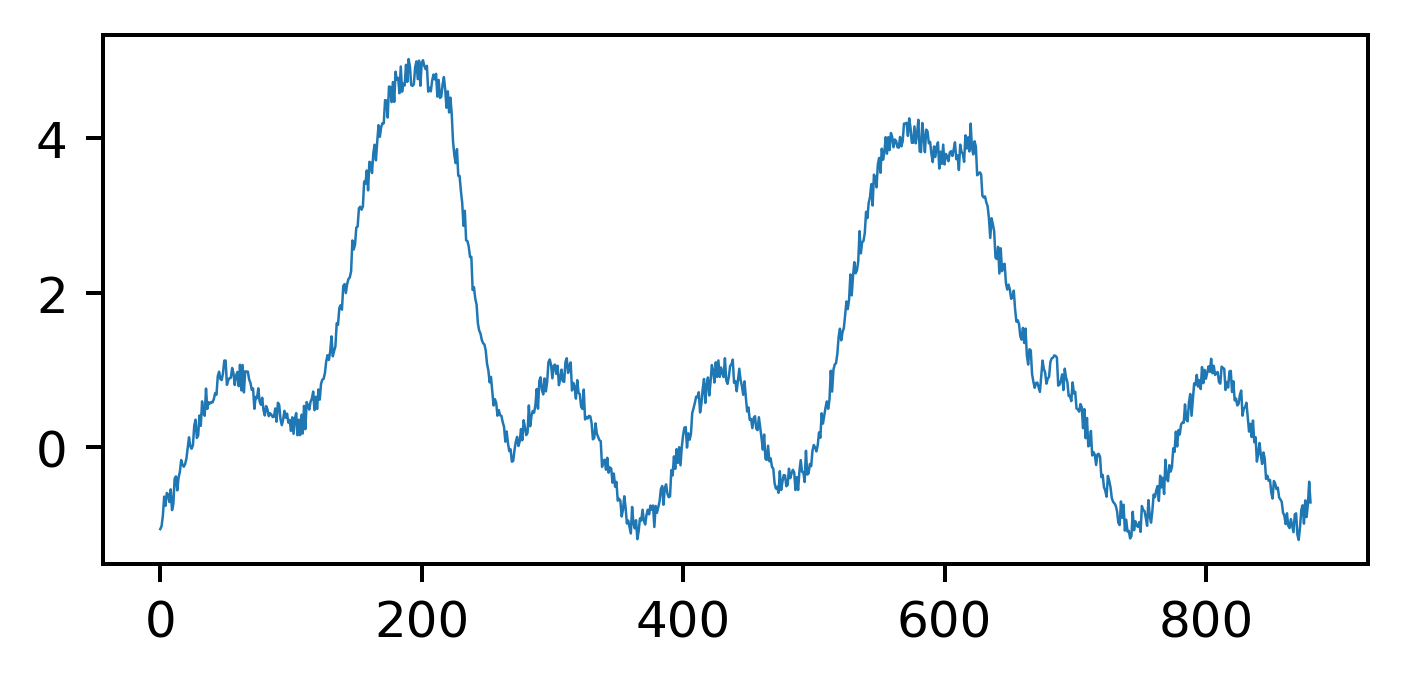

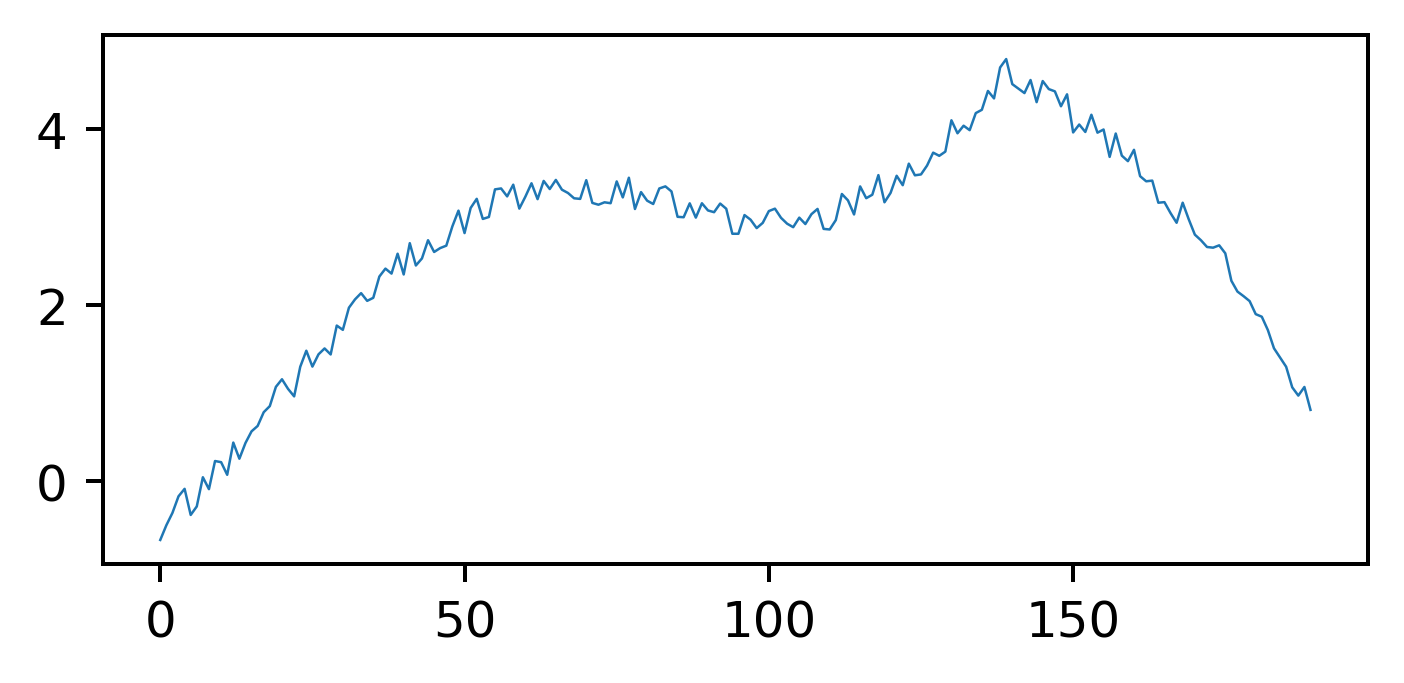

In [26]:
depth = 1
series_by_depth = xtstree.cut_series_by_depth(series)[depth]
for s in series_by_depth:
	plot(s)